# Analysis of Covid-19 data from the New York Times

https://github.com/nytimes/covid-19-data

"The New York Times is releasing a series of data files with cumulative counts of coronavirus cases in the United States, at the state and county level, over time. We are compiling this time series data from state and local governments and health departments in an attempt to provide a complete record of the ongoing outbreak."

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:1650px !important; }</style>"))
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter, NullFormatter, FuncFormatter
import seaborn as sns
sns.set()
pd.options.mode.chained_assignment = None

## Load data from CSV files

In [2]:
county_df = pd.read_csv('us-counties.csv', index_col='date', parse_dates=True)
state_df = pd.read_csv('us-states.csv', index_col='date', parse_dates=True)

## Define functions to make it easy to select a subset of the data

In [3]:
# A function to get data for a specific county and add a column for the # of days since the first reported case
def get_county_data(state, county):
    subset = county_df[(county_df['county']==county) & (county_df['state']==state)]
    first_case = subset.index[0]
    subset['delta_days'] = (subset.index - first_case).astype('timedelta64[D]')
    return(subset)

In [4]:
# A function to get data for a specific state and add a column for the # of days since the first reported case
def get_state_data(state):
    subset = state_df[state_df['state']==state]
    first_case = subset.index[0]
    subset['delta_days'] = (subset.index - first_case).astype('timedelta64[D]')
    return(subset)

## Plot Number of Cases in California, Washington, and Virginia

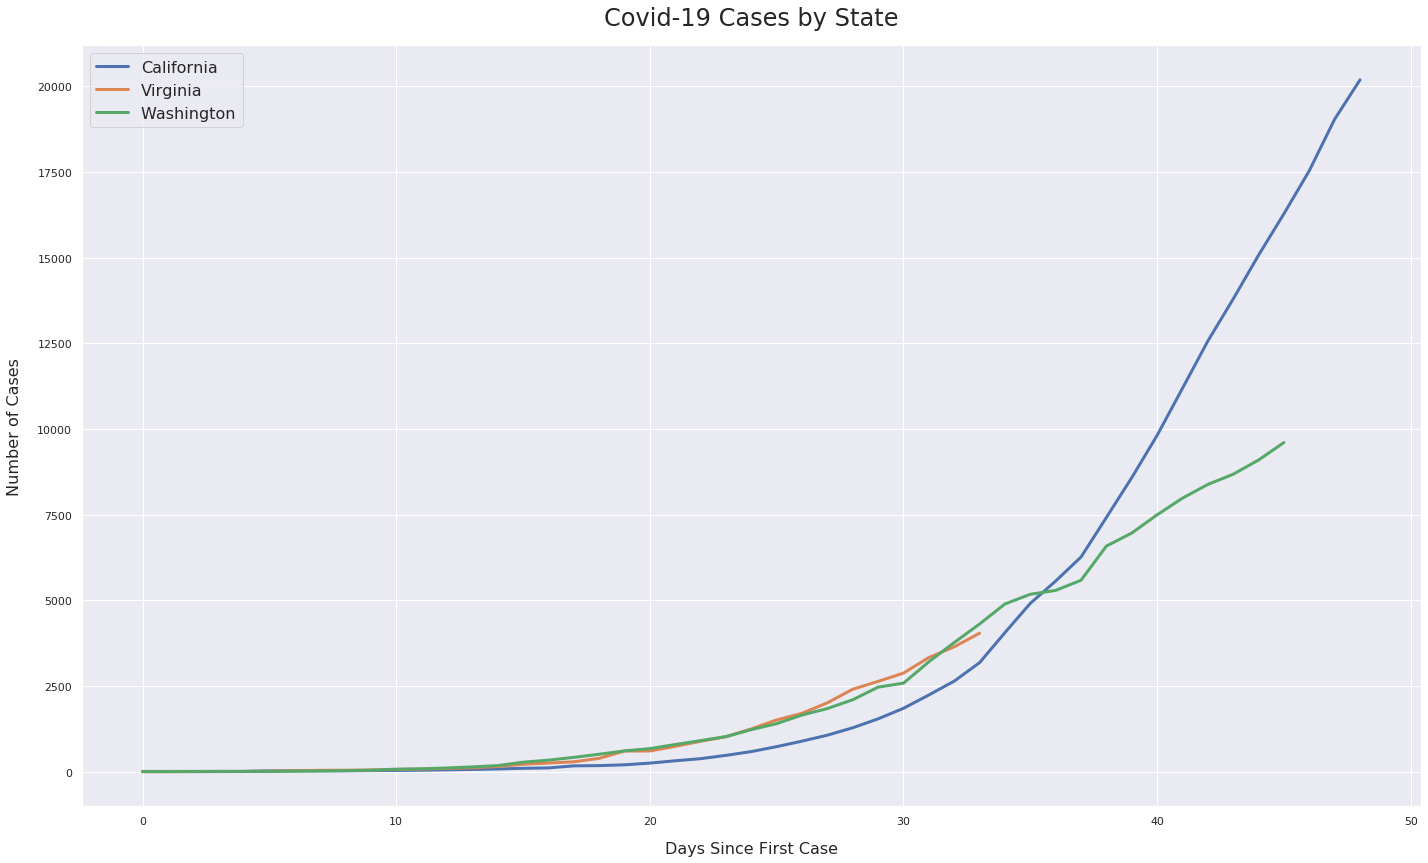

In [5]:
ca = get_state_data('California')
# CA had only 1 reported case for a very long time, so I'm starting this dataset when actual growth in confirmed cases started.
ca = ca[ca['cases']>1]
ca = ca[ca.index>'2020-02-20']
ca['delta_days'] = ca['delta_days']-ca['delta_days'][0]

# Growth in WA started on Feb 23rd
wa = get_state_data('Washington')
wa = wa[wa.index>'2020-02-23']
wa['delta_days'] = wa['delta_days']-wa['delta_days'][0]

va = get_state_data('Virginia')
ny = get_state_data('New York')

fig, ax = plt.subplots(figsize=(24, 14))
ax.plot(ca['delta_days'], ca['cases'], linewidth=3, label='California')
ax.plot(va['delta_days'], va['cases'], linewidth=3, label='Virginia')
ax.plot(wa['delta_days'], wa['cases'], linewidth=3, label='Washington')
# New York has so many cases that the Y axis makes the other data difficult to see
#ax.plot(ny['delta_days'], ny['cases'], linewidth=3, label='New York')

plt.title('Covid-19 Cases by State', fontsize=24, pad=20)
ax.set_ylabel('Number of Cases', fontsize=16, labelpad=15)
ax.set_xlabel('Days Since First Case', fontsize=16, labelpad=15)

plt.legend(fontsize=16)

# Examine the doubling rate for each state

The slope of the number of cases when plotted on a log scale gives a visual reference for the doubling rate.  If interventions such as "safer at home" are working then the slope of the number of cases will be decreasing with time. If not, the line will appear linear.

Text(0.5, 1.0, 'Growth Rate of Covid-19 Cases, California')

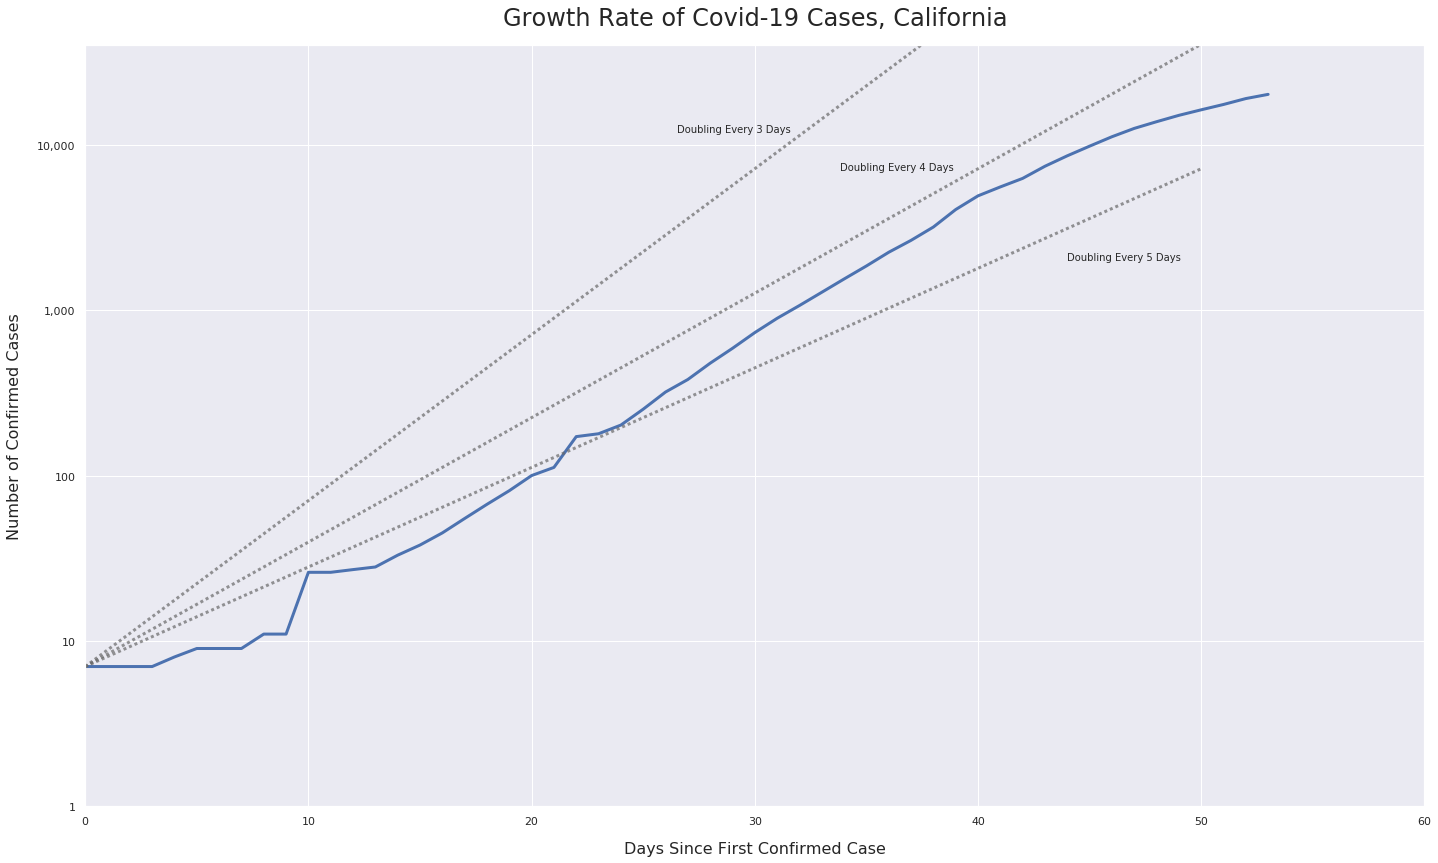

In [6]:
ca = get_state_data('California')
# CA had only 1 reported case for a very long time, so I'm starting this dataset when actual growth in confirmed cases started.
ca = ca[ca.index>'2020-02-15']
ca['delta_days'] = ca['delta_days']-ca['delta_days'][0]
initial_cases = ca['cases'][0]

fig, ax = plt.subplots(figsize=(24, 14))

# A list for plotting doubling time reference lines
x_ref = np.linspace(0,50,51)
line_ca, = ax.plot(ca['delta_days'], ca['cases'], linewidth=3, label='California')

ax.plot(x_ref, [initial_cases*(2**(1/3*x)) for x in x_ref], linewidth=3, dashes=[1,1], label='Doubling Every 3 Days', color='dimgrey', alpha=0.7)
ax.text(26.5, 12000, 'Doubling Every 3 Days', fontsize=10)

ax.plot(x_ref, [initial_cases*(2**(1/4*x)) for x in x_ref], linewidth=3, dashes=[1,1], label='Doubling Every 4 Days', color='dimgrey', alpha=0.7)
ax.text(33.8, 7000, 'Doubling Every 4 Days', fontsize=10)

ax.plot(x_ref, [initial_cases*(2**(1/5*x)) for x in x_ref], linewidth=3, dashes=[1,1], label='Doubling Every 5 Days', color='dimgrey', alpha=0.7)
ax.text(44, 2000, 'Doubling Every 5 Days', fontsize=10)

plt.yscale('log')

ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_yticks([10**x for x in range(0,7)])
ax.set_ylim(1,40000)

ax.set_xlim(0,60)

ax.set_xlabel('Days Since First Confirmed Case', fontsize=16, labelpad=15)
ax.set_ylabel('Number of Confirmed Cases', fontsize=16, labelpad=15)

plt.title('Growth Rate of Covid-19 Cases, California', fontsize=24, pad=20)

Text(0.5, 1.0, 'Growth Rate of Covid-19 Deaths, California')

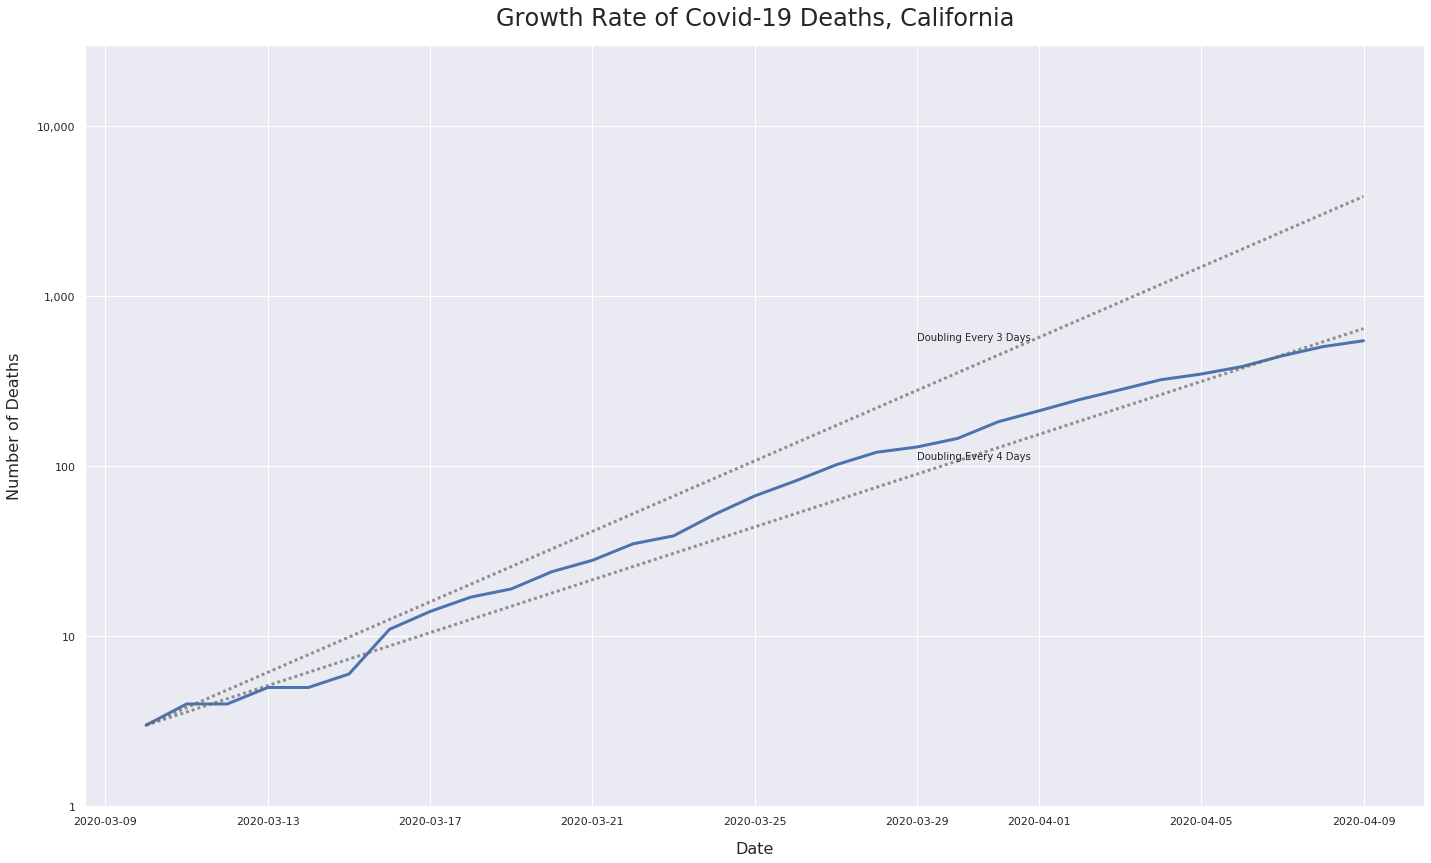

In [9]:
ca = get_state_data('California')
# CA had only 1 reported case for a very long time, so I'm starting this dataset when actual growth in confirmed cases started.
ca = ca[ca.index>'2020-03-09']
initial_cases = ca['deaths'][0]

fig, ax = plt.subplots(figsize=(24, 14))

# A list for plotting doubling time reference lines
x_ref = np.linspace(0, len(ca.index), len(ca.index))
line_ca, = ax.plot(ca.index, ca['deaths'], linewidth=3, label='California')

ax.plot(ca.index, [initial_cases*(2**(1/3*x)) for x in x_ref], linewidth=3, dashes=[1,1], label='Doubling Every 3 Days', color='dimgrey', alpha=0.7)
ax.text('2020-03-29', 550, 'Doubling Every 3 Days', fontsize=10)

ax.plot(ca.index, [initial_cases*(2**(1/4*x)) for x in x_ref], linewidth=3, dashes=[1,1], label='Doubling Every 4 Days', color='dimgrey', alpha=0.7)
ax.text('2020-03-29', 110, 'Doubling Every 4 Days', fontsize=10)

plt.yscale('log')

ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_yticks([10**x for x in range(0,7)])
ax.set_ylim(1,30000)

#ax.set_xlim(0,45)

ax.set_xlabel('Date', fontsize=16, labelpad=15)
ax.set_ylabel('Number of Deaths', fontsize=16, labelpad=15)

plt.title('Growth Rate of Covid-19 Deaths, California', fontsize=24, pad=20)

Text(0.5, 1.0, 'Growth Rate of Covid-19 Cases in Washington State')

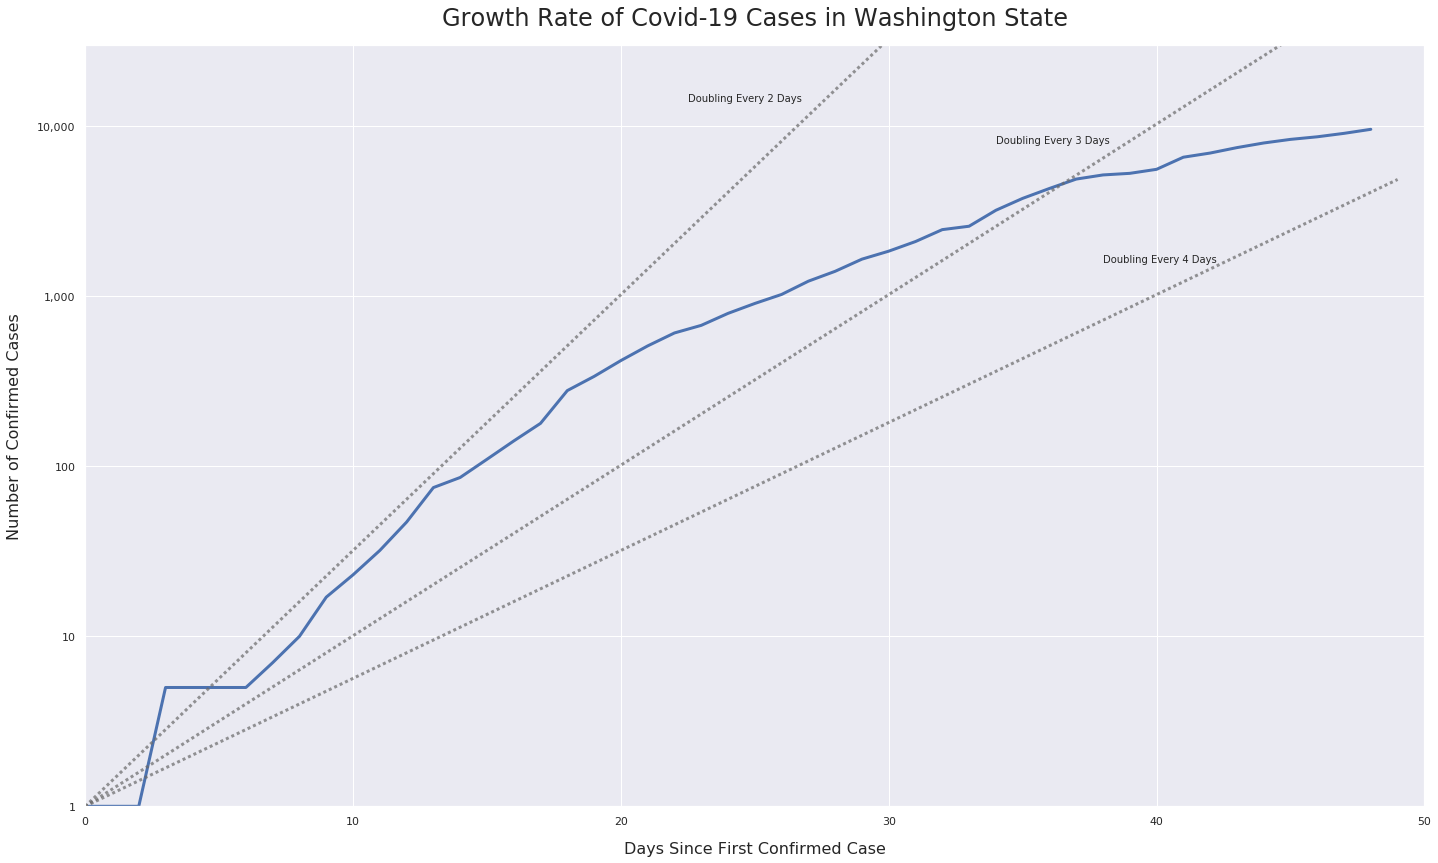

In [10]:
wa = get_state_data('Washington')
# Set start date to when actual growth in confirmed cases started.
wa = wa[wa.index>'2020-02-20']
wa['delta_days'] = wa['delta_days']-wa['delta_days'][0]
initial_cases = wa['cases'][0]

fig, ax = plt.subplots(figsize=(24, 14))

# A list for plotting doubling time reference lines
x_ref = np.linspace(0, len(wa), len(wa))
ax.plot(wa['delta_days'], wa['cases'], linewidth=3, label='Washington')

ax.plot(x_ref, [initial_cases*(2**(1/2*x)) for x in x_ref], linewidth=3, dashes=[1,1], label='Doubling Every 2 Days', color='dimgrey', alpha=0.7)
ax.text(22.5, 14000, 'Doubling Every 2 Days', fontsize=10)

ax.plot(x_ref, [initial_cases*(2**(1/3*x)) for x in x_ref], linewidth=3, dashes=[1,1], label='Doubling Every 3 Days', color='dimgrey', alpha=0.7)
ax.text(34, 8000, 'Doubling Every 3 Days', fontsize=10)

ax.plot(x_ref, [initial_cases*(2**(1/4*x)) for x in x_ref], linewidth=3, dashes=[1,1], label='Doubling Every 4 Days', color='dimgrey', alpha=0.7)
ax.text(38, 1600, 'Doubling Every 4 Days', fontsize=10)

plt.yscale('log')

ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_yticks([10**x for x in range(0,7)])
ax.set_ylim(1,30000)

ax.set_xlim(0,50)

ax.set_xlabel('Days Since First Confirmed Case', fontsize=16, labelpad=15)
ax.set_ylabel('Number of Confirmed Cases', fontsize=16, labelpad=15)

plt.title('Growth Rate of Covid-19 Cases in Washington State', fontsize=24, pad=20)

Text(0.5, 1.0, 'Growth Rate of COVID-19 Deaths in Washington State')

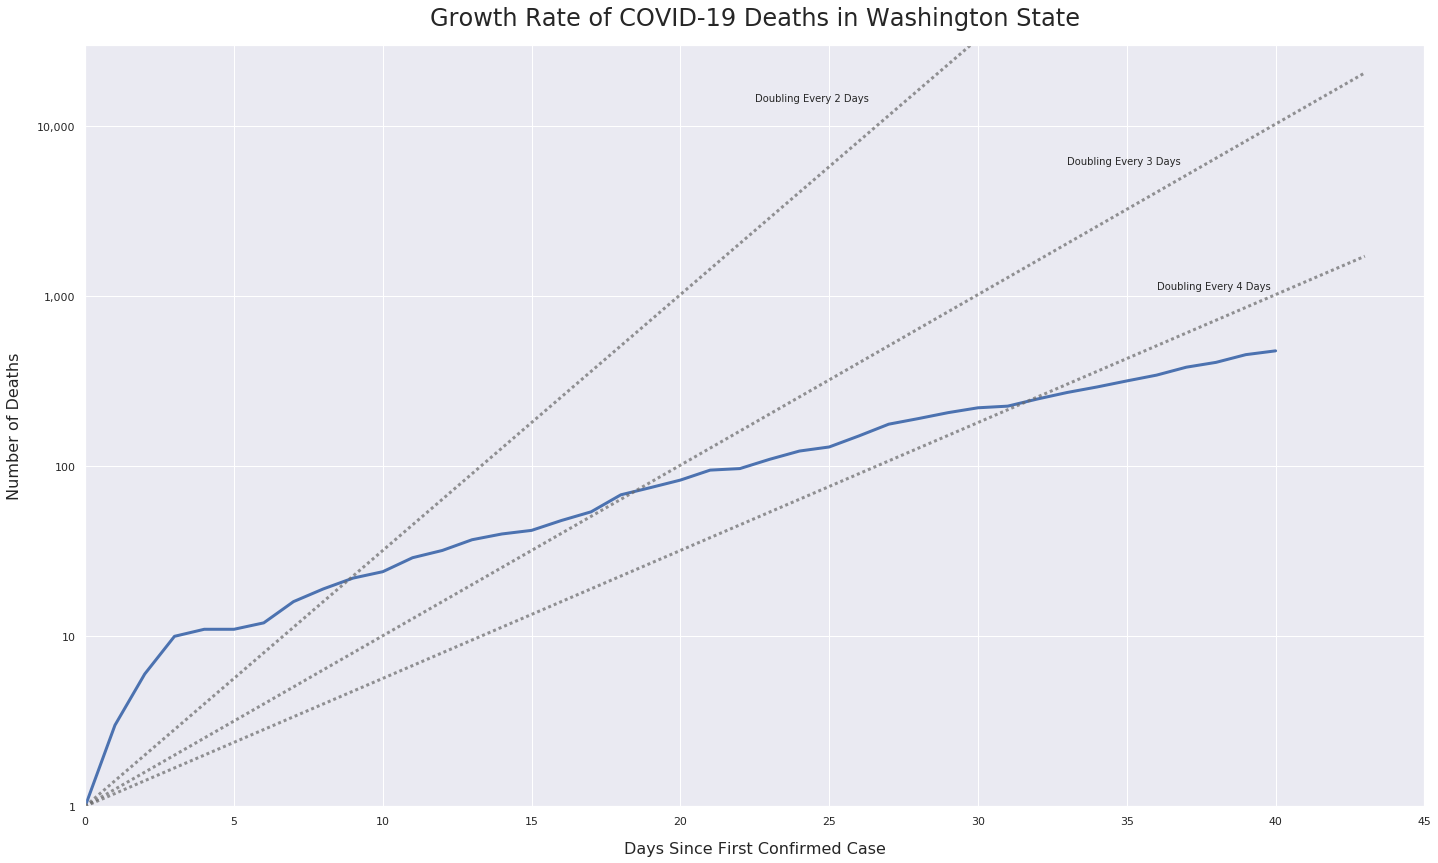

In [12]:
wa = get_state_data('Washington')
# Set start date to when actual growth in confirmed cases started.
wa = wa[wa.index>'2020-02-28']
wa['delta_days'] = wa['delta_days']-wa['delta_days'][0]
initial_cases = 1

fig, ax = plt.subplots(figsize=(24, 14))

# A list for plotting doubling time reference lines
x_ref = np.linspace(0, len(wa)+2, len(wa)+2)
ax.plot(wa['delta_days'], wa['deaths'], linewidth=3, label='Washington')

ax.plot(x_ref, [initial_cases*(2**(1/2*x)) for x in x_ref], linewidth=3, dashes=[1,1], label='Doubling Every 2 Days', color='dimgrey', alpha=0.7)
ax.text(22.5, 14000, 'Doubling Every 2 Days', fontsize=10)

ax.plot(x_ref, [initial_cases*(2**(1/3*x)) for x in x_ref], linewidth=3, dashes=[1,1], label='Doubling Every 3 Days', color='dimgrey', alpha=0.7)
ax.text(33, 6000, 'Doubling Every 3 Days', fontsize=10)

ax.plot(x_ref, [initial_cases*(2**(1/4*x)) for x in x_ref], linewidth=3, dashes=[1,1], label='Doubling Every 4 Days', color='dimgrey', alpha=0.7)
ax.text(36, 1100, 'Doubling Every 4 Days', fontsize=10)

plt.yscale('log')

ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_yticks([10**x for x in range(0,7)])
ax.set_ylim(1,30000)

ax.set_xlim(0, 45)

ax.set_xlabel('Days Since First Confirmed Case', fontsize=16, labelpad=15)
ax.set_ylabel('Number of Deaths', fontsize=16, labelpad=15)

plt.title('Growth Rate of COVID-19 Deaths in Washington State', fontsize=24, pad=20)

Text(0.5, 1.0, 'Growth Rate of Covid-19 Cases, New York')

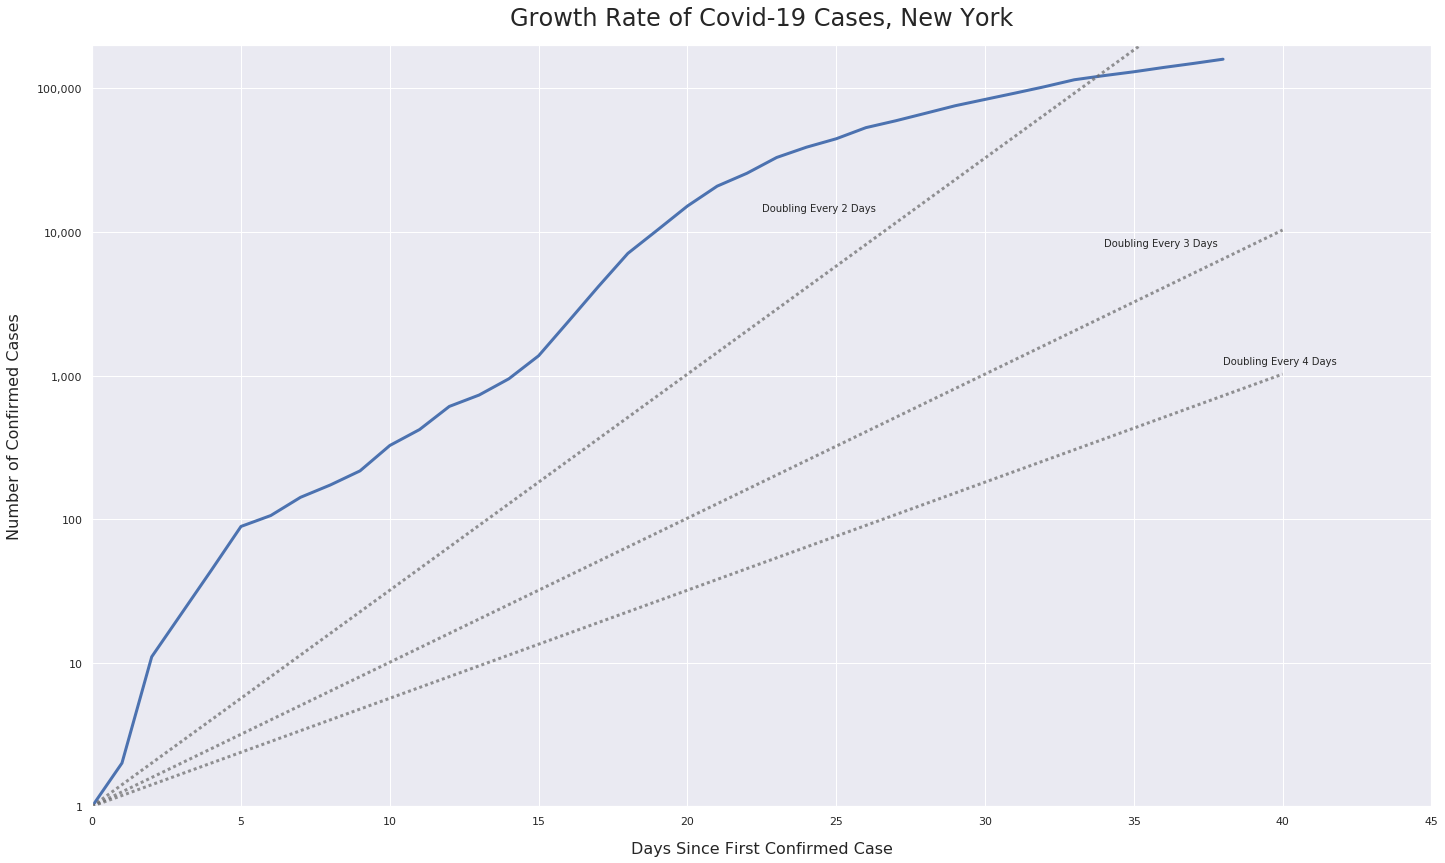

In [15]:
ny = get_state_data('New York')
# Set start date to when actual growth in confirmed cases started.
ny = ny[ny.index>'2020-03-01']
ny['delta_days'] = ny['delta_days']-ny['delta_days'][0]
initial_cases = ny['cases'][0]

fig, ax = plt.subplots(figsize=(24, 14))

# A list for plotting doubling time reference lines
x_ref = np.linspace(0,40,41)

ax.plot(ny['delta_days'], ny['cases'], linewidth=3, label='New York')

ax.plot(x_ref, [initial_cases*(2**(1/2*x)) for x in x_ref], linewidth=3, dashes=[1,1], label='Doubling Every 2 Days', color='dimgrey', alpha=0.7)
ax.text(22.5, 14000, 'Doubling Every 2 Days', fontsize=10)

ax.plot(x_ref, [initial_cases*(2**(1/3*x)) for x in x_ref], linewidth=3, dashes=[1,1], label='Doubling Every 3 Days', color='dimgrey', alpha=0.7)
ax.text(34, 8000, 'Doubling Every 3 Days', fontsize=10)

ax.plot(x_ref, [initial_cases*(2**(1/4*x)) for x in x_ref], linewidth=3, dashes=[1,1], label='Doubling Every 4 Days', color='dimgrey', alpha=0.7)
ax.text(38, 1200, 'Doubling Every 4 Days', fontsize=10)

plt.yscale('log')
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_yticks([10**x for x in range(0,7)])
ax.set_ylim(1,200000)

ax.set_xlim(0,45)

ax.set_xlabel('Days Since First Confirmed Case', fontsize=16, labelpad=15)
ax.set_ylabel('Number of Confirmed Cases', fontsize=16, labelpad=15)

plt.title('Growth Rate of Covid-19 Cases, New York', fontsize=24, pad=20)

Text(0.5, 1.0, 'Growth Rate of Covid-19 Deaths, New York')

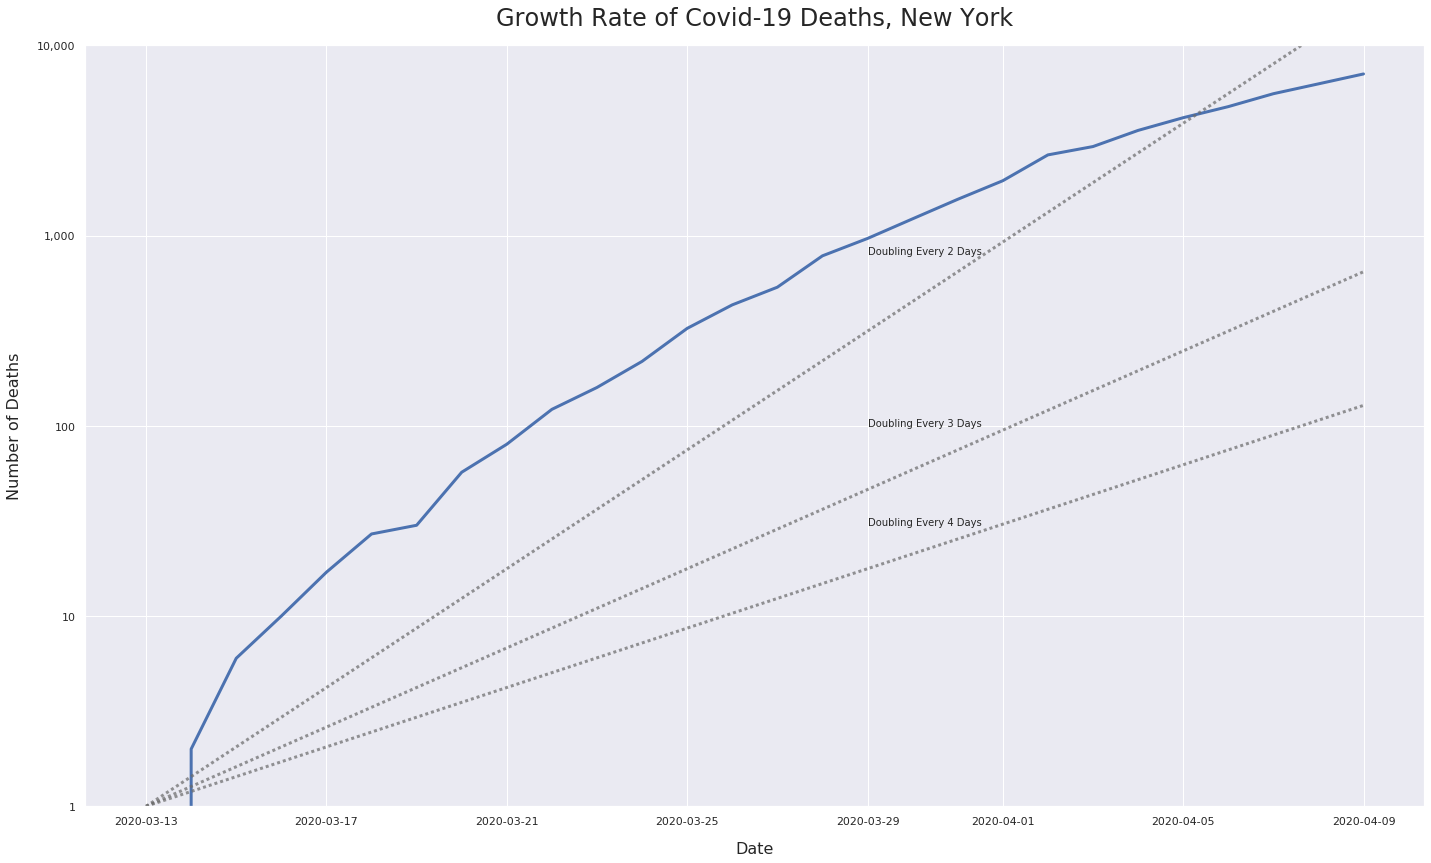

In [16]:
ny = get_state_data('New York')
# Set start date to when actual growth in confirmed cases started.
ny = ny[ny.index>'2020-03-12']
initial_cases = 1

fig, ax = plt.subplots(figsize=(24, 14))

# A list for plotting doubling time reference lines
x_ref = np.linspace(0, len(ny.index), len(ny.index))

ax.plot(ny.index, ny['deaths'], linewidth=3, label='New York')

ax.plot(ny.index, [initial_cases*(2**(1/2*x)) for x in x_ref], linewidth=3, dashes=[1,1], label='Doubling Every 2 Days', color='dimgrey', alpha=0.7)
ax.text('2020-03-29', 800, 'Doubling Every 2 Days', fontsize=10)

ax.plot(ny.index, [initial_cases*(2**(1/3*x)) for x in x_ref], linewidth=3, dashes=[1,1], label='Doubling Every 3 Days', color='dimgrey', alpha=0.7)
ax.text('2020-03-29', 100, 'Doubling Every 3 Days', fontsize=10)

ax.plot(ny.index, [initial_cases*(2**(1/4*x)) for x in x_ref], linewidth=3, dashes=[1,1], label='Doubling Every 4 Days', color='dimgrey', alpha=0.7)
ax.text('2020-03-29', 30, 'Doubling Every 4 Days', fontsize=10)

plt.yscale('log')
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_yticks([10**x for x in range(0,7)])
ax.set_ylim(1,10000)

#ax.set_xlim(0,45)

ax.set_xlabel('Date', fontsize=16, labelpad=15)
ax.set_ylabel('Number of Deaths', fontsize=16, labelpad=15)

plt.title('Growth Rate of Covid-19 Deaths, New York', fontsize=24, pad=20)

## A closer look at individual counties

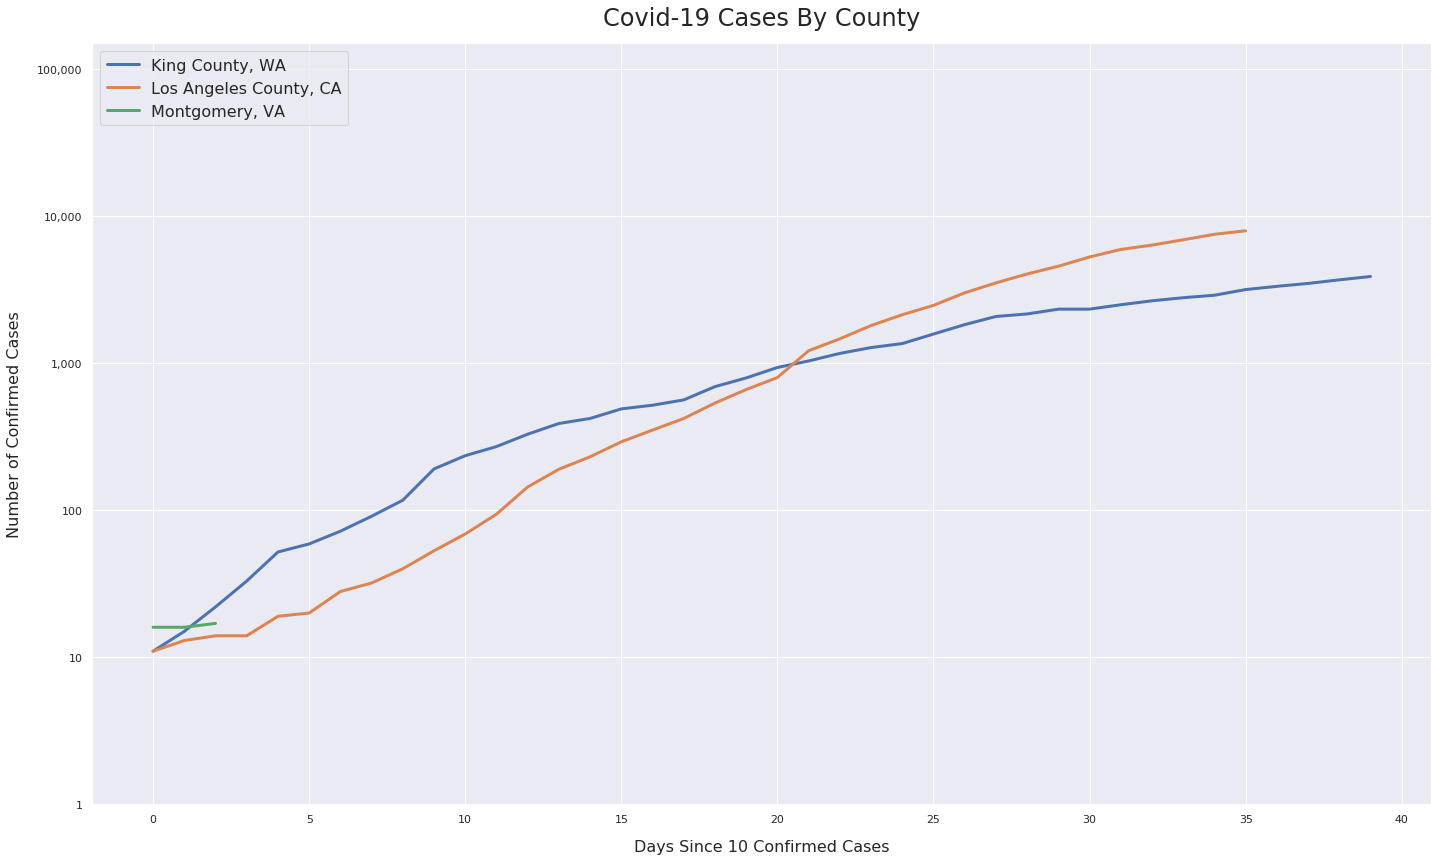

In [22]:
ca_la = get_county_data('California', 'Los Angeles')
wa_king = get_county_data('Washington', 'King')
ny_nyc = get_county_data('New York', 'New York City')
va_m = get_county_data('Virginia','Montgomery')


wa_king = wa_king[wa_king['cases']>=10]
wa_king['delta_days'] = wa_king['delta_days']-wa_king['delta_days'][0]
ca_la = ca_la[ca_la['cases']>=10]
ca_la['delta_days'] = ca_la['delta_days']-ca_la['delta_days'][0]
va_m = va_m[va_m['cases']>=10]
va_m['delta_days'] = va_m['delta_days']-va_m['delta_days'][0]


# A list for plotting doubling time reference lines
x_ref = np.linspace(0,40,41)

fig, ax = plt.subplots(figsize=(24, 14))

line_wa, = plt.plot(wa_king['delta_days'], wa_king['cases'], label='King County, WA', linewidth=3)
line_ca, = plt.plot(ca_la['delta_days'], ca_la['cases'], label='Los Angeles County, CA', linewidth=3)
line_va, = plt.plot(va_m['delta_days'], va_m['cases'], label='Montgomery, VA', linewidth=3)
#plt.plot(ny_nyc['delta_days'], ny_nyc['cases'], label='New York City', linewidth=3) # Blows up the Y axis because there are so many cases

plt.yscale('log')
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_yticks([10**x for x in range(0,7)])
ax.set_ylim(1,150000)

plt.title('Covid-19 Cases By County', fontsize=24, pad=18)
ax.set_xlabel('Days Since 10 Confirmed Cases', fontsize=16, labelpad=15)
ax.set_ylabel('Number of Confirmed Cases', fontsize=16, labelpad=15)
legend_handles = [line_wa, line_ca, line_va]
plt.legend(loc='upper left', handles=legend_handles, fontsize=16)
